In [1]:
from src.data_loaders import load_fb_close_stock_price
from src.visualization import viz_time_series
from src.data_analysis import compute_moving_mean, compute_moving_std

import matplotlib.pyplot as plt

In [2]:
data = load_fb_close_stock_price()

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999


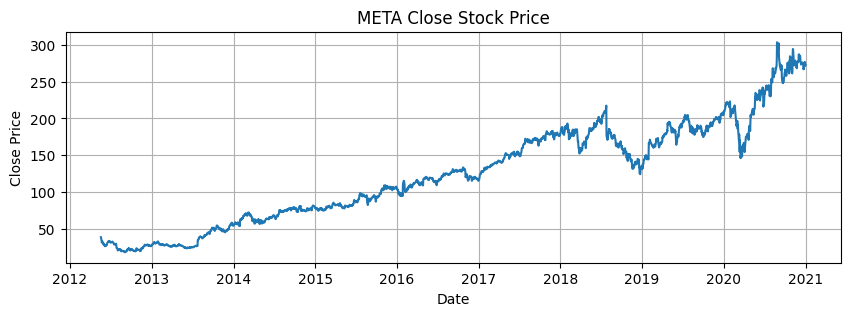

In [4]:
viz_time_series(data=data,
                title="META Close Stock Price",
                xlabel="Date", ylabel="Close Price")